In [152]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [153]:
df_title_akas = pd.read_csv('zippeddata/imdb.title.akas.csv')
df_title_basics = pd.read_csv('zippeddata/imdb.title.basics.csv')
df_title_ratings = pd.read_csv('zippeddata/imdb.title.ratings.csv.gz')
df_title_crew = pd.read_csv('zippeddata/imdb.title.crew.csv.gz')
df_title_principals = pd.read_csv('zippeddata/imdb.title.principals.csv')
df_name_basics = pd.read_csv('zippeddata/imdb.name.basics.csv')


In [154]:
dfcheck = pd.read_csv('zippeddata/tmdb.movies.csv')

In [155]:
df_title_basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [156]:
df_title_basics.isna().sum()

tconst                 0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [157]:
df_title_ratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [158]:
df_title_crew.head()

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


In [159]:
df_title_principals.head()

,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


In [160]:
df_name_basics.head()

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


In [161]:
# Merging Database to have names 

In [162]:
df_merge_actors = pd.merge(df_name_basics, df_title_principals, how='inner', on="nconst")


In [163]:
df_merge_actors.head()

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles,tconst,ordering,category,job,characters
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553",tt2398241,9,producer,producer,NaN
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940",tt0433397,7,composer,NaN,NaN
2,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940",tt1681372,8,composer,NaN,NaN
3,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940",tt2387710,8,composer,NaN,NaN
4,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940",tt2281215,7,composer,NaN,NaN


In [164]:
df_title_crew.head()

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


In [165]:
df_title_crew.rename(columns = {'directors':'nconst'}, inplace = True)

In [166]:
dfcrewname = pd.merge(df_name_basics,df_title_crew,how='right', on='nconst')

In [167]:
dfcrewname.head()

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles,tconst,writers
0,nm0062879,Ruel S. Bayani,NaN,NaN,"director,production_manager,miscellaneous","tt2590280,tt0352080,tt0216559,tt2057445",tt1592569,"nm1288308,nm2752054,nm4037950,nm4059063"
1,nm0062879,Ruel S. Bayani,NaN,NaN,"director,production_manager,miscellaneous","tt2590280,tt0352080,tt0216559,tt2057445",tt8421806,"nm2752054,nm6747643"
2,nm0062879,Ruel S. Bayani,NaN,NaN,"director,production_manager,miscellaneous","tt2590280,tt0352080,tt0216559,tt2057445",tt2057445,"nm1282374,nm2874544,nm2752054"
3,nm0062879,Ruel S. Bayani,NaN,NaN,"director,production_manager,miscellaneous","tt2590280,tt0352080,tt0216559,tt2057445",tt2590280,nm0911075
4,nm0064023,Bryan Beasley,NaN,NaN,"director,producer,writer","tt3501180,tt1485100,tt1358897,tt1387162",tt4512140,NaN


In [168]:
dfcrewname.rename(columns = {'primary_name': 'director_name'}, inplace = True)

In [169]:
dfcrewname.drop(columns=['nconst','birth_year','death_year','known_for_titles','primary_profession'],inplace = True)

In [170]:
dfcrewname.head()

,director_name,tconst,writers
0,Ruel S. Bayani,tt1592569,"nm1288308,nm2752054,nm4037950,nm4059063"
1,Ruel S. Bayani,tt8421806,"nm2752054,nm6747643"
2,Ruel S. Bayani,tt2057445,"nm1282374,nm2874544,nm2752054"
3,Ruel S. Bayani,tt2590280,nm0911075
4,Bryan Beasley,tt4512140,NaN


In [171]:
dfcrewname.dropna(inplace = True)
dfcrewname.isna().sum()

director_name    0
tconst           0
writers          0
dtype: int64

In [172]:
dfallinfo = pd.merge(df_title_basics, dfcrewname, how = 'inner', on = 'tconst')

In [173]:
dfallinfo.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,director_name,writers
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",Harnam Singh Rawail,"nm0023551,nm1194313,nm0347899,nm1391276"
1,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,Orson Welles,"nm0000080,nm0462648"
2,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",Hrishikesh Mukherjee,nm0347899
3,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy,Frank Howson,nm0398271
4,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",Anthony Harrison,nm0365480


In [175]:
dfrevenue = pd.read_csv('cleandata/movierevenue.csv',index_col = 0)

In [176]:
dfrevenue.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year_released,age,decades,day,month,markup,profitmargin,netprofit
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,2009,11,1,Friday,12,5.532577,0.846921,2351345279
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011,9,0,Friday,5,1.546673,0.607331,635063875
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,2019,1,0,Friday,6,-0.572108,-1.337036,-200237650
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,2015,5,0,Friday,5,3.243841,0.764364,1072413963
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017,3,0,Friday,12,3.153696,0.759251,999721747


In [177]:
def get_directors(movie_title):
    try:
        directors = dfallinfo.loc[dfallinfo['primary_title']==movie_title,'director_name'].values[0]
    except:
        directors = None
    return directors

In [178]:
dfrevenue['directors'] = dfrevenue['movie'].apply(get_directors)

In [179]:
dfrevenue.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year_released,age,decades,day,month,markup,profitmargin,netprofit,directors
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,2009,11,1,Friday,12,5.532577,0.846921,2351345279,Atsushi Wada
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011,9,0,Friday,5,1.546673,0.607331,635063875,Rob Marshall
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,2019,1,0,Friday,6,-0.572108,-1.337036,-200237650,Simon Kinberg
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,2015,5,0,Friday,5,3.243841,0.764364,1072413963,Joss Whedon
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017,3,0,Friday,12,3.153696,0.759251,999721747,None


In [180]:
dfrevenue['directors'][0] = 'James Cameron'

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [181]:
dfrevenue.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year_released,age,decades,day,month,markup,profitmargin,netprofit,directors
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,2009,11,1,Friday,12,5.532577,0.846921,2351345279,James Cameron
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011,9,0,Friday,5,1.546673,0.607331,635063875,Rob Marshall
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,2019,1,0,Friday,6,-0.572108,-1.337036,-200237650,Simon Kinberg
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,2015,5,0,Friday,5,3.243841,0.764364,1072413963,Joss Whedon
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017,3,0,Friday,12,3.153696,0.759251,999721747,None


In [182]:
dfrevenue.dropna(inplace = True)

In [183]:
dfrevenue.groupby(['movie','directors'])['worldwide_gross'].sum().sort_values(ascending = False)[:25]

movie                                        directors        
Avatar                                       James Cameron        2776345279
Titanic                                      Ravi Punj            2208208395
Beauty and the Beast                         Christophe Gans      1867630838
Jurassic World                               Colin Trevorrow      1648854864
The Avengers                                 Joss Whedon          1566521313
Furious 7                                    James Wan            1518722794
Avengers: Age of Ultron                      Joss Whedon          1403013963
Black Panther                                Ryan Coogler         1348258224
Jurassic World: Fallen Kingdom               J.A. Bayona          1305772799
Frozen                                       Adam Green           1272469910
Incredibles 2                                Brad Bird            1242520711
The Fate of the Furious                      F. Gary Gray         1234846267
Iron Man 3   

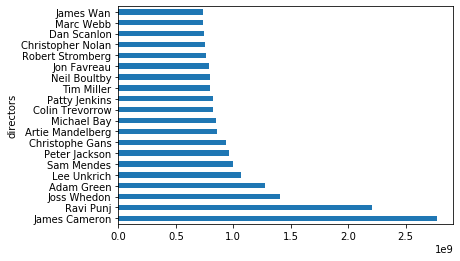

In [184]:
dfrevenue.groupby('directors')['worldwide_gross'].median().sort_values(ascending = False)[:20].plot(kind = 'barh')

In [185]:
dfrevenue.corr()

,id,production_budget,domestic_gross,worldwide_gross,year_released,age,decades,month,markup,profitmargin,netprofit
id,1.000000,-0.042236,-0.009690,-0.021759,-0.011036,0.011036,0.010223,-0.007926,0.002737,0.041251,-0.014000
production_budget,-0.042236,1.000000,0.709431,0.779340,0.119736,-0.119736,-0.103825,-0.020962,-0.047734,0.031249,0.651365
domestic_gross,-0.009690,0.709431,1.000000,0.943233,0.025984,-0.025984,-0.012339,0.003128,0.133216,0.029976,0.934776
worldwide_gross,-0.021759,0.779340,0.943233,1.000000,0.072463,-0.072463,-0.059459,0.012350,0.104389,0.025987,0.983078
year_released,-0.011036,0.119736,0.025984,0.072463,1.000000,-1.000000,-0.964141,-0.032092,-0.288955,-0.019127,0.052741
age,0.011036,-0.119736,-0.025984,-0.072463,-1.000000,1.000000,0.964141,0.032092,0.288955,0.019127,-0.052741
decades,0.010223,-0.103825,-0.012339,-0.059459,-0.964141,0.964141,1.000000,0.027922,0.285466,0.019844,-0.041647
month,-0.007926,-0.020962,0.003128,0.012350,-0.032092,0.032092,0.027922,1.000000,0.010261,-0.038696,0.021084
markup,0.002737,-0.047734,0.133216,0.104389,-0.288955,0.288955,0.285466,0.010261,1.000000,0.014396,0.140362
profitmargin,0.041251,0.031249,0.029976,0.025987,-0.019127,0.019127,0.019844,-0.038696,0.014396,1.000000,0.022342
